from labs.install_deps import require_think_dsp

require_think_dsp()

Упражнение 2.2
Напишем класс SawtoothSignal, расширяющий signal и предоставляющий evaluate для оценки пилообразного сигнала.

In [2]:
from thinkdsp import Sinusoid
from thinkdsp import normalize, unbias
import numpy as np

class SawtoothSignal(Sinusoid):
    def evaluate(self, ts):
        cycles = self.freq * ts + self.offset / np.pi / 2
        frac, _ = np.modf(cycles)
        ys = normalize(unbias(frac), self.amp)
        return ys

In [3]:
sawtooth = SawtoothSignal().make_wave(duration=0.5, framerate=40000)
sawtooth.make_audio()

Вычислим спектр для пилообразного сигнала.

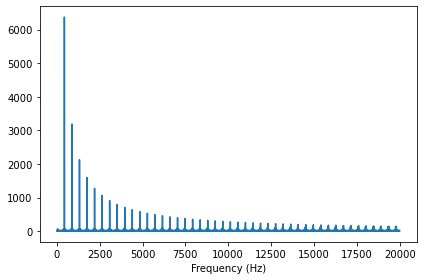

In [4]:
from thinkdsp import decorate

sawtooth.make_spectrum().plot()
decorate(xlabel='Frequency (Hz)')

Пилообразная форма затухает таким же образом, как и прямоугольная, однако она включает в себя и четные, и нечетные гармоники. Произведено уменьшение амплитуды прямоугольной волны, чтобы сделать ее сопоставимой с пилообразной.

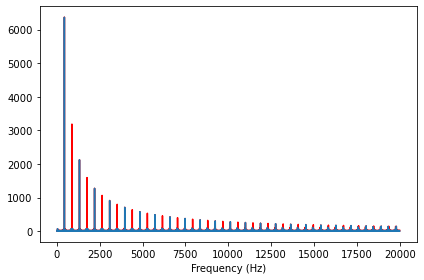

In [6]:
from thinkdsp import SquareSignal

sawtooth.make_spectrum().plot(color='red')
square = SquareSignal(amp=0.5).make_wave(duration=0.5, framerate=40000)
square.make_spectrum().plot()
decorate(xlabel='Frequency (Hz)')

По сравнению с треугольной формой, пилообразная затухает не так быстро. Гармоники треугольного сигнала затухают пропорционально 1/f^2, в то время как гармоники пилообразного сигнала - 1/f.

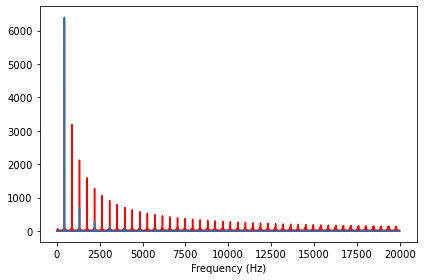

In [7]:
from thinkdsp import TriangleSignal

sawtooth.make_spectrum().plot(color='red')
triangle = TriangleSignal(amp=0.79).make_wave(duration=0.5, framerate=40000)
triangle.make_spectrum().plot()
decorate(xlabel='Frequency (Hz)')

Упражнение 2.3
Создадим прямоугольный сигнал 1100 Гц и вычислим wave с выборками 10000 кадров в секунду.

In [2]:
from thinkdsp import SquareSignal

square = SquareSignal(1100).make_wave(duration=0.5, framerate=10000)

Построим спектр.

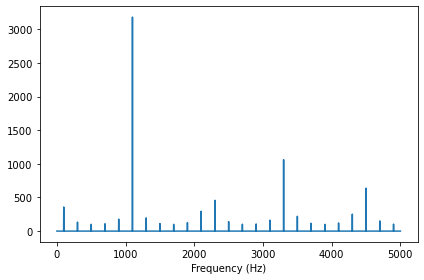

In [3]:
from thinkdsp import decorate

square.make_spectrum().plot()
decorate(xlabel='Frequency (Hz)')

Основная гармоника на 1100 Гц, первая гармоника на 3300 Гц, вторая гармоника на 4500 Гц (должна былы бы быть на 5500 Гц), третья гармоника на 2300 Гц (должна былы бы быть на 7700 Гц), 4я - 100 Гц (9900 Гц) и т.д.

In [4]:
square.make_audio()

Большинство гармоник действительно "завернуты" из-за биений.
Остальные гармоники перекрываются с теми, которые мы уже видели.
Когда мы слушаем волну, основная высота тона, которую мы воспринимаем, - это алиас на частоте 100 Гц.

Упражнение 2.4
Возьмем объект Spectrum и распечатаем несколько первых значений spectrum.fs. Убедимся, что они начинаются с нуля. Для осознания этого факта проведем эксперимент.

Создадим треугольный сигнал с частотой 440 Гц и wave длительностью 0,01 секунд. Распечатаем этот сигнал.

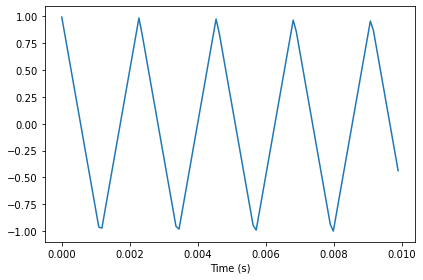

In [5]:
from thinkdsp import TriangleSignal

triangle = TriangleSignal(440).make_wave(duration=0.01)
triangle.plot()
decorate(xlabel='Time (s)')

Создадим объект Spectrum и распечатаем Spectrum.hs[].

In [17]:
from cmath import polar

spectrum = triangle.make_spectrum()
spectrum.hs[0]

(ampl, phase) = polar(spectrum.hs[0])
print("Фаза:", phase)
print("Амплитуда:", ampl)

Фаза: 0.0
Амплитуда: 1.0436096431476471e-14


Первый элемент спектра - это комплексное число, близкое к нулю.

Установим Spectrum.hs[0] = 100. Если мы добавляем к компоненте нулевой частоты, это приведет к добавлению вертикального смещения волны.


Фаза: 0.0
Амплитуда: 100.0


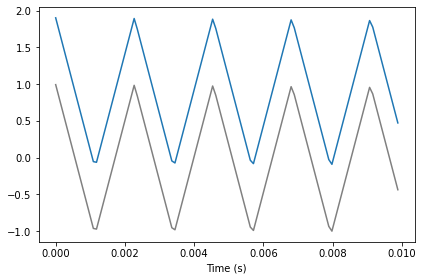

In [18]:
spectrum.hs[0] = 100

(ampl, phase) = polar(spectrum.hs[0])
print("Фаза:", phase)
print("Амплитуда:", ampl)

triangle.plot(color='gray')
spectrum.make_wave().plot()
decorate(xlabel='Time (s)')

Упражнение 2.5
Напишем функцию, принимающую Spectrum как параметр и изменяющую его делением каждого элемента hs на соответсвующую частоту из fs.

In [8]:
def filter_spectrum(spectrum):
    spectrum.hs[1:] /= spectrum.fs[1:]
    spectrum.hs[0] = 0

Проверим эту функцию с помощью прямоугольного сигнала.

In [9]:
wave = TriangleSignal(freq=440).make_wave(duration=0.5)
wave.make_audio()

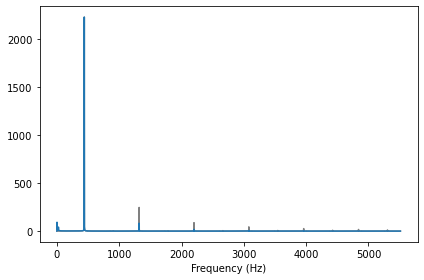

In [10]:
spectrum = wave.make_spectrum()
spectrum.plot(high=10000, color='gray')
filter_spectrum(spectrum)
spectrum.scale(440)
spectrum.plot(high=10000)
decorate(xlabel='Frequency (Hz)')

Фильтр подавляет гармоники, поэтому он действует как фильтр нижних частот.

In [11]:
filtered = spectrum.make_wave()
filtered.make_audio()

Треугольная волна теперь звучит почти как синусоидальная волна.

Упражнение 2.6
Найдем сигнал, спадающий пропорционально 1/f^2, и состоящий из четных и нечетных гармоник.

Для этого будем суммировать косинусоидальные сигналы.

In [19]:
import numpy
from thinkdsp import CosSignal

freqs = numpy.arange(500, 9500, 500)
amps = 1 / freqs**2
signal = sum(CosSignal(freq, amp) for freq, amp in zip(freqs, amps))
signal

Вычислим спектр.

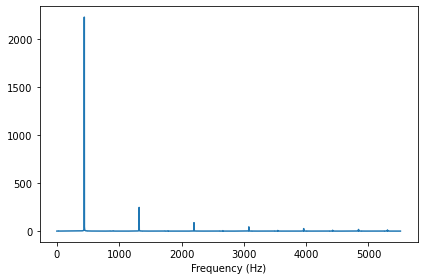

In [20]:
spectrum = wave.make_spectrum()
spectrum.plot()
decorate(xlabel='Frequency (Hz)')

Прослушаем звук.

In [21]:
wave = signal.make_wave(duration=0.5, framerate=20000)
wave.make_audio()

И посмотрим на график.

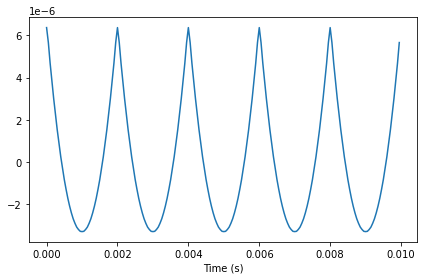

In [22]:
wave.segment(duration=0.01).plot()
decorate(xlabel='Time (s)')